<a href="https://colab.research.google.com/github/Shafiq-Abdu/Tutorial/blob/main/lob__animation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/matplotlib/animation.py:884: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(
<ipython-input-4-a37381ea437a>:62: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


GIF created successfully: lob_animation.gif


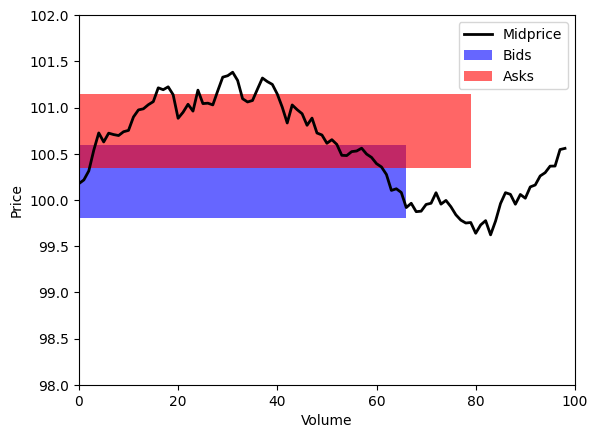

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import imageio  # Library to save the animation as a GIF

# Function to generate simulated order book data
def generate_order_book_data(num_ticks=100):
    np.random.seed(0)
    timestamps = np.arange(0, num_ticks)
    midprice = 100 + np.cumsum(np.random.randn(num_ticks) * 0.1)  # Simulate midprice
    bid_price = midprice - (np.random.rand(num_ticks) * 0.5)
    ask_price = midprice + (np.random.rand(num_ticks) * 0.5)
    bid_volume = np.random.randint(1, 100, num_ticks)  # Random volumes
    ask_volume = np.random.randint(1, 100, num_ticks)
    return pd.DataFrame({
        'timestamp': timestamps,
        'midprice': midprice,
        'bid_price': bid_price,
        'ask_price': ask_price,
        'bid_volume': bid_volume,
        'ask_volume': ask_volume
    })

# Create the order book data
order_book_df = generate_order_book_data()

# Set up the figure and axis
fig, ax = plt.subplots()

# Function to update the plot at each frame
def update(frame):
    ax.clear()
    ax.set_xlim(0, 100)
    ax.set_ylim(98, 102)

    # Update bid and ask bars
    ax.barh(order_book_df['bid_price'][frame], order_book_df['bid_volume'][frame], color='blue', alpha=0.6, label='Bids')
    ax.barh(order_book_df['ask_price'][frame], order_book_df['ask_volume'][frame], color='red', alpha=0.6, label='Asks')

    # Plot midprice
    ax.plot(order_book_df['midprice'][:frame], color='black', lw=2, label='Midprice')

    # Add legend and labels
    ax.legend(loc='upper right')
    ax.set_xlabel('Volume')
    ax.set_ylabel('Price')

# Generate frames for the animation
filenames = []
for frame in range(len(order_book_df)):
    update(frame)  # Update the plot for each frame

    # Save the frame as an image
    filename = f'frame_{frame}.png'
    filenames.append(filename)
    plt.savefig(filename)

# Create a GIF from the saved frames
with imageio.get_writer('lob_animation.gif', mode='I', duration=0.1) as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

print("GIF created successfully: lob_animation.gif")


Change FPS accordingly

GIF created successfully!


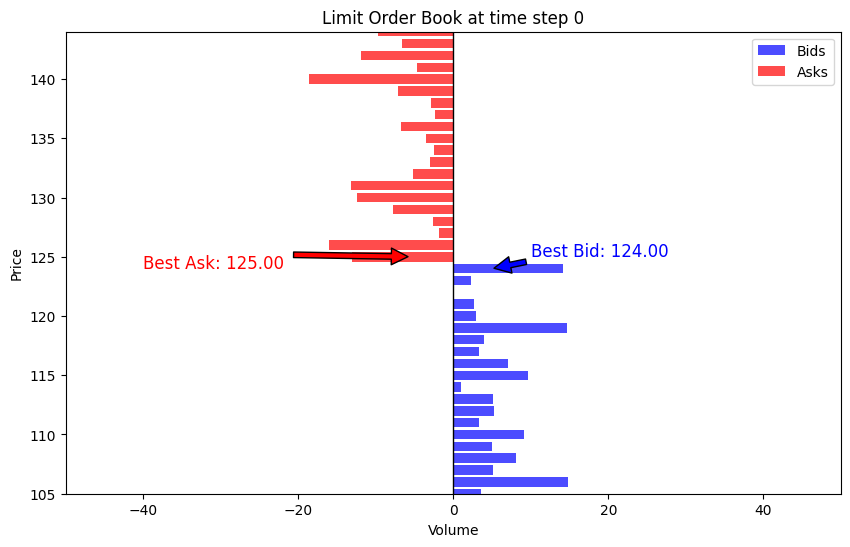

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import imageio

# 1. Generate synthetic order book data
def generate_synthetic_lob_data(num_ticks=100):
    np.random.seed(42)
    prices = np.arange(105, 145, 1)  # Price levels
    bid_depths = np.abs(np.random.randn(len(prices)) * 10)  # Random bid depths
    ask_depths = np.abs(np.random.randn(len(prices)) * 10)  # Random ask depths
    data = []

    for t in range(num_ticks):
        midprice = 125 + np.random.randn() * 2  # Simulate midprice fluctuation
        bid_depths = np.abs(np.random.randn(len(prices)) * 10)
        ask_depths = np.abs(np.random.randn(len(prices)) * 10)
        bid_depths[prices >= midprice] = 0  # Bids only below midprice
        ask_depths[prices <= midprice] = 0  # Asks only above midprice
        data.append((prices, bid_depths, ask_depths, midprice))

    return data

# 2. Create the animation
lob_data = generate_synthetic_lob_data(num_ticks=100)

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Animation update function
def update(frame):
    ax.clear()
    prices, bid_depths, ask_depths, midprice = lob_data[frame]

    # Plot bid and ask depths as horizontal bar charts
    ax.barh(prices, bid_depths, color='blue', alpha=0.7, label='Bids')
    ax.barh(prices, -ask_depths, color='red', alpha=0.7, label='Asks')

    # Add labels and title
    ax.axvline(0, color='black', lw=1)  # Add a vertical line for the 0 volume
    ax.set_xlim(-50, 50)
    ax.set_ylim(min(prices), max(prices))
    ax.set_xlabel('Volume')
    ax.set_ylabel('Price')
    ax.set_title(f"Limit Order Book at time step {frame}")

    # Add annotations for best bid and ask
    best_bid = prices[bid_depths > 0].max()
    best_ask = prices[ask_depths > 0].min()
    ax.annotate(f"Best Bid: {best_bid:.2f}", xy=(5, best_bid), xytext=(10, best_bid + 1),
                arrowprops=dict(facecolor='blue', shrink=0.05), fontsize=12, color='blue')
    ax.annotate(f"Best Ask: {best_ask:.2f}", xy=(-5, best_ask), xytext=(-40, best_ask - 1),
                arrowprops=dict(facecolor='red', shrink=0.05), fontsize=12, color='red')

    # Display legend
    ax.legend(loc='upper right')

# 3. Create and save the animation as GIF
ani = FuncAnimation(fig, update, frames=len(lob_data), repeat=False)

# Save the animation as a GIF
ani.save('synthetic_lob_animation4.gif', writer='imagemagick', fps=4)

print("GIF created successfully!")


In [ ]:
df = pd.read_csv('aapl.csv')


In [ ]:
df

,Unnamed: 0,index,A2P,A2V,A1P,A1V,B1P,B1V,B2P,B2V,Cash,Inventory,Position,Action,Order ID,Price,Volume,Type,Direction
0,0,264,1547700,100,1547500,258,1546400,100,1546300,61,1.000000e+09,1000000.0,{},Limit Order,9040569.0,1547400.0,54.0,1.0,1.0
1,1,546,1548000,173,1547900,165,1547100,100,1546900,100,9.999916e+08,1000054.0,{},No action,NaN,NaN,NaN,NaN,NaN
2,2,646,1546900,9,1546800,100,1546300,323,1546000,200,9.999916e+08,1000054.0,{},Market Order,9334013.0,1546800.0,24.0,4.0,-1.0
3,3,695,1547100,100,1547000,422,1546500,10,1546100,500,9.999879e+08,1000078.0,{},Limit Order,9400521.0,1546500.0,100.0,1.0,1.0
4,4,703,1547500,100,1547100,100,1546600,110,1546500,100,9.999879e+08,1000078.0,"{9400521: (1546500, 100)}",Cancel Order,9400521.0,1546500.0,100.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25408,25408,557363,1577200,500,1576900,100,1576600,200,1576500,200,9.974073e+08,1016509.0,{},No action,NaN,NaN,NaN,NaN,NaN
25409,25409,557490,1578100,100,1578000,400,1577600,101,1577500,300,9.974073e+08,1016509.0,{},No action,NaN,NaN,NaN,NaN,NaN
25410,25410,557559,1578000,200,1577900,600,1577500,775,1577400,600,9.974073e+08,1016509.0,{},Limit Order,399971997.0,1577500.0,4700.0,1.0,1.0
25411,25411,557640,1577900,100,1577800,300,1577600,600,1577500,6000,9.974073e+08,1016509.0,{},Market Order,400027789.0,1577600.0,15.0,4.0,1.0


LOB Animation (slower and styled) Saved!


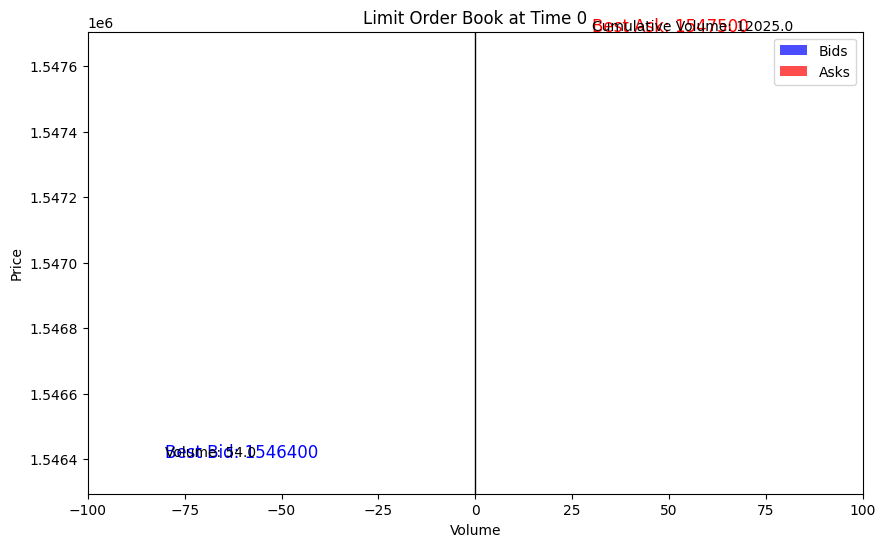

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Load the dataset
lob_data = pd.read_csv('aapl.csv')

# Trim the dataset to the first 100 rows for faster animation (you can adjust this number)
trimmed_lob_data = lob_data.head(100)  # Trimming to first 100 rows

# Prepare the columns (ask/bid prices and volumes)
ask_prices = ['A1P', 'A2P']
ask_volumes = ['A1V', 'A2V']
bid_prices = ['B1P', 'B2P']
bid_volumes = ['B1V', 'B2V']

# Create a figure for plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Function to update the LOB for each frame
def update(frame):
    ax.clear()

    # Get the current row of data
    current_lob = trimmed_lob_data.iloc[frame]

    # Extract bid and ask prices/volumes
    bids = [-current_lob[bid_vol] for bid_vol in bid_volumes]  # Negative for bid side
    bid_p = current_lob[bid_prices]
    asks = current_lob[ask_volumes]
    ask_p = current_lob[ask_prices]

    # Plot bid/ask prices and volumes as horizontal bars
    ax.barh(bid_p, bids, color='blue', alpha=0.7, label='Bids')
    ax.barh(ask_p, asks, color='red', alpha=0.7, label='Asks')

    # Add labels and title
    ax.axvline(0, color='black', lw=1)
    ax.set_xlabel('Volume')
    ax.set_ylabel('Price')
    ax.set_title(f"Limit Order Book at Time {frame}")

    # Customize the limits and ticks to match the reference image better
    ax.set_xlim([-100, 100])  # Adjust volume range to fit your data
    ax.set_ylim([min(current_lob[bid_prices].min(), current_lob[ask_prices].min()) - 5,
                 max(current_lob[bid_prices].max(), current_lob[ask_prices].max()) + 5])

    # Additional annotations for visualization clarity
    ax.text(-80, max(bid_p) + 5, f"Best Bid: {current_lob['B1P']}", fontsize=12, color='blue')
    ax.text(30, max(ask_p) + 5, f"Best Ask: {current_lob['A1P']}", fontsize=12, color='red')

    # Other annotations like volume and cumulative volume
    ax.text(-80, max(bid_p) + 10, f"Volume: {current_lob['Volume']}", fontsize=10, color='black')
    ax.text(30, max(ask_p) + 10, f"Cumulative Volume: {trimmed_lob_data['Volume'].sum()}", fontsize=10, color='black')

    ax.legend()

# Create the animation
ani = FuncAnimation(fig, update, frames=len(trimmed_lob_data), repeat=False)

# Save as GIF with slower fps (e.g., 5 fps for slower motion)
ani.save('lob_animation_slow.gif', writer='imagemagick', fps=5)

print("LOB Animation (slower and styled) Saved!")
